###1. Import packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2
import random
import zipfile

###2. Upload and load data
At first we have to download the PetImagesSmall from the Class Google Drive and
upload it to our own drive in the root directory. https://drive.google.com/file/d/12co0EY5ffKOs4DXKjmIRbUqEaY_f1FHr/view?usp=sharing

In [23]:
zip_ref = zipfile.ZipFile("datasets\PetImages.zip", 'r')
zip_ref.extractall("datasets")
zip_ref.close()

###3. Accessing and edting image data

a. Using python os library to build path to images

In [24]:
# location of PetImagesSmall Folder, google drive must be mounted correctly
DATADIR = "datasets/PetImages"

# Classes of images we have
CATEGORIES = ["Cat", "Dog"]

def get_label(label_index):
  return CATEGORIES[label_index]

# Creating path to folder Cat inside PetImages Small
path = os.path.join(DATADIR, CATEGORIES[0])

# get a list all directories in a folder
print(os.listdir(path))

# path to first cat image
path_to_img = os.path.join(path, "0.jpg")


['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '8.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '9.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg']


b. Accessing and displaying RGB images using OpenCV and Matplotlib

(375, 500, 3)


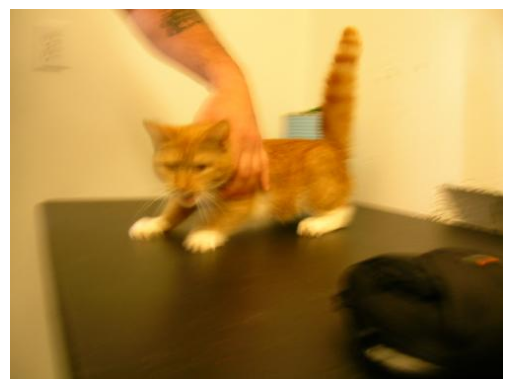

In [25]:
# Using openCV library to read the first image in the Cat folder
# cv2.imread() returns a 3d matrix, 3rd dimension
img_array = cv2.imread(path_to_img)
print(img_array.shape)

# cv2 reads in BGR format by default
# using cv2.cvtColor to convert color format to RGB from BGR
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.axis("off")
plt.show()

c. Converting BGR image to Grayscale 

(375, 500)


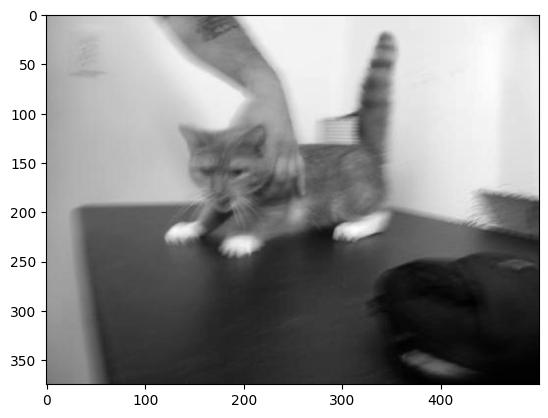

In [26]:
# convert image to grayscale
# img_array = cv2.imread(os.path.join(path, "0.jpg"), cv2.IMREAD_GRAYSCALE)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
# the array is a 2d matrix now as grayscale only needs 1 color channel
print(img_array.shape)
plt.imshow(img_array, cmap="gray")
plt.show()

d. Resizing images

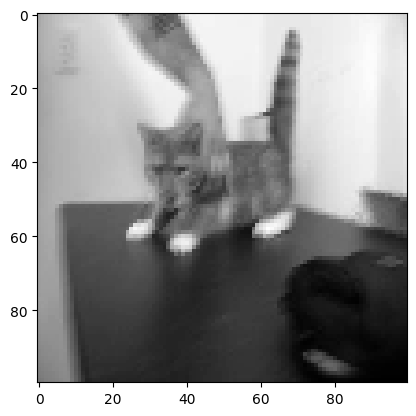

In [27]:
# resize image
IMG_SIZE = 100
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_array, cmap="gray")
plt.show()

###4. Creating training data for KNN

a. Flatten image into a vector using numpy ravel() function

In [28]:
# flatten the the image into a vector
# the image is flattened row by row
print(img_array)
img_array.ravel()


[[146 151 156 ... 189 185 182]
 [146 151 156 ... 192 187 184]
 [147 152 155 ... 195 189 186]
 ...
 [109 110 112 ...   3   3   2]
 [107 109 111 ...   2   2   2]
 [104 106 110 ...   1   1   1]]


array([146, 151, 156, ...,   1,   1,   1], dtype=uint8)

b. Create a training sample consisting of a flattened vector of an image and its appropriate label as an index of the CATEGORIES list

$$ CATEGORIES = ['Cat',\ 'Dog']$$

The labels should be 0 for Cat images and 1 for Dog images

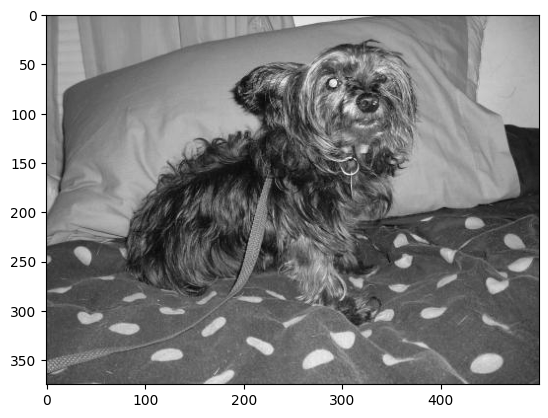

In [29]:
# Create a training sample 
class_label = 1 # Accessing Dog folder
path = os.path.join(DATADIR, CATEGORIES[class_label]) # Accessing Dog folder
img_path = os.path.join(path, str(0)+".jpg")
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# training sample
# feature set/image | class_label 
# one element of training_data
training_sample = [img_array, class_label]
plt.imshow(img_array, cmap="gray")

c. Use the examples shown above to create a numpy list of training_samples from the images and store it in a list named **training_data**

In [30]:
# Create a list of Training data samples and 
data = []
def create_training_data():
    for category in CATEGORIES:
            path = os.path.join(DATADIR, category)
            class_label = CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)).ravel()
                    data.append([new_array, class_label])
                except Exception as e:
                    pass
        
create_training_data()
print(len(data))

200


### **DATA**
**data** is a list of 200 **data_sample**. 

Each, **data_sample** contains two elements: 

i) A numpy array of size 10000 

ii) A label containing 0 or 1 indicating the label/class (Cat or Dog) the image belongs to

The first element of **data_sample** is really a flattened image of size 100x100



[array([168, 173, 178, ...,   1,   1,   1], dtype=uint8), 0]
Size of data: 200

One element in data: 
Image: [168 173 178 ...   1   1   1] 
Label: 0

 (100, 100)
[[168 173 178 ... 211 208 204]
 [168 173 178 ... 213 209 206]
 [169 174 177 ... 215 211 208]
 ...
 [128 129 131 ...   3   3   2]
 [126 128 130 ...   3   3   3]
 [123 125 129 ...   1   1   1]]


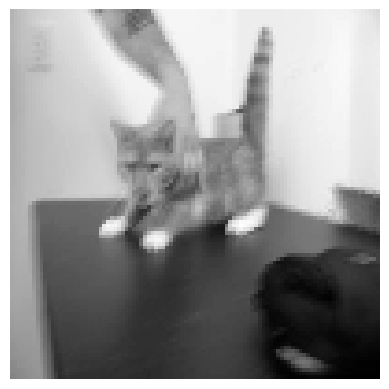

In [31]:
print(data[0])
print(f"Size of data: {len(data)}")

img = data[0][0]
label = data[0][1]
print("\nOne element in data: ")
print(f"Image: {img} \nLabel: {label}")

img = data[0][0].reshape(100,100)
print("\n", img.shape)
print(img)
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()

d. Shuffle the training data and split the data into training and testing sets

In [32]:
# shuffle the training data
random.shuffle(data)

# store images and their corresponding labels in separate lists named X and Y respectively
# each column contains one data point
X = [] # flattened images
Y = [] # labels of the images

for img, label in data:
  X.append(img)
  Y.append(label)


# separate training and testing data
split_at = int(0.8*len(data))

X_train = X[0:split_at]
Y_train = Y[0:split_at]
X_test = X[split_at:]
Y_test = Y[split_at:]
len(X_test)

40

e. Feed data into KNN function imported from Sklearn library and print the accuracy of the result

Predicted Y/labels: [1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1]
Actual Y/labels:    [1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]

Acuraccy: 0.375

CONFUSION MATRIX
[[ 7 14]
 [11  8]]

First image prediction: Dog


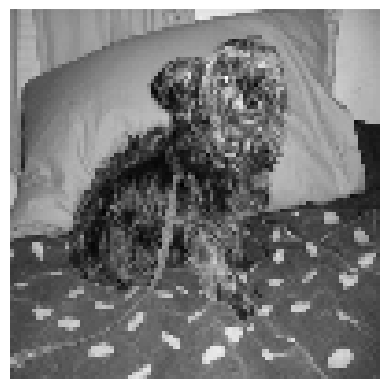

In [33]:
from sklearn import metrics
# can be used to judge accuracy of algorithm's predictions
# np.sum(y_true == y_pred) counts number of times condition is true 
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# use library knn
from sklearn.neighbors import KNeighborsClassifier
# k neighbours
k = 3
#initialize knn class
classifier = KNeighborsClassifier(n_neighbors=k)
# passing data points the knn algorithm will use to determine class
classifier.fit(X_train, Y_train)
# passing our X_test set (images) to get predictions for Y (labels)
predictions = classifier.predict(X_test)


print(f"Predicted Y/labels: {predictions}")
print(f"Actual Y/labels:    {np.array(Y_test)}")
print(f"\nAcuraccy: {accuracy(Y_test, predictions)}")

print("\nCONFUSION MATRIX")
print(metrics.confusion_matrix(Y_test, predictions))
print(f"\nFirst image prediction: {get_label(predictions[0])}")
plt.imshow(X_test[0].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.axis("off")
plt.show()

##5. Implement KNN Algorithm

**Implement the K-nearest-neighbour algorithm in python**

KNN algorithm uses a fixed set of datapoints to predict the labels of new data given. 

That is, for our case KNN needs a list of flattened images and their correspoding labels , X_train and Y_train. When predicticing the label for a new image, KNN finds the euclidean distance for that image against all datapoints it has stored. It then picks k nearest datapoints based on the distance, then counts their corresponding labels. The label that had the highest count gets returned as the predicted label. 



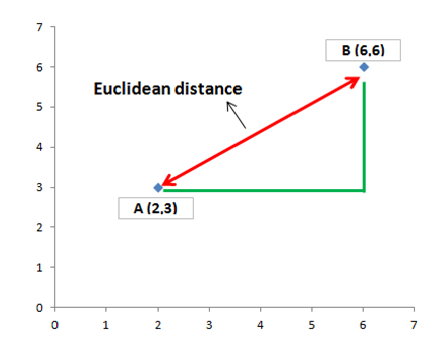

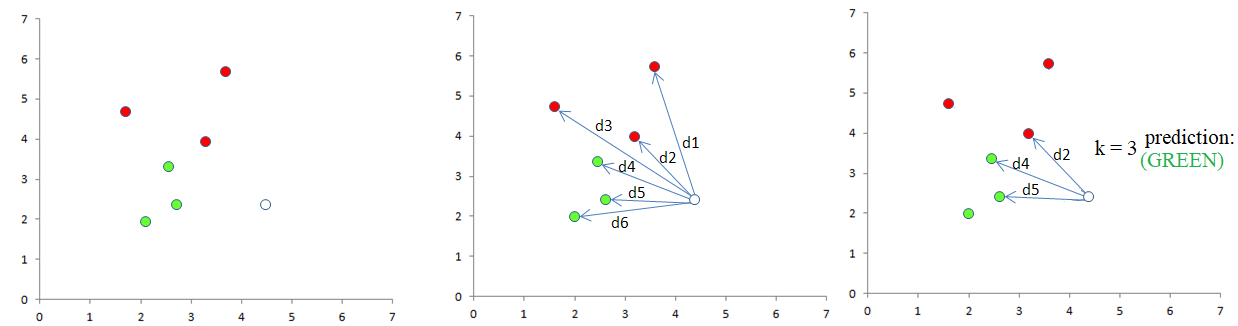

####Predicted label for white data point is **Green**

#### **Problem 1**
a) Implement a function to find the Euclidean distance between two vectors
  $$euclidean\_distance = \sqrt[2]{\sum(x_1 - x_2)^2}$$

b) Use the X_train and Y_train lists as the stored data points to be used for prediction

c) Randomly take an element, **x_in**, from the **X_test** set, store the index

d) Find euclidean distance of **x_in** against all elements in **X_train set** 

e) Find the index of the datapoint in **X_train** that is nearest (lowest euclidean distance) to to **x_in** 

f) Find the corresponding label of the nearest element in **X_train** in the **Y_train** list. Hint: they have the same index

g) Return the label found in **Y_train** as the prediction

h) Check if the prediction was correct by comparing it with the actual label stored for the image **x_in** in the **Y_test** list (you can use the index stored for **x_in** to find its corresponding label in **Y_test**). 

In [34]:
# shuffle the training data
random.shuffle(data)
# store images and their corresponding labels in separate lists named X and Y respectively
# each column contains one data point
X = [] # flattened images
Y = [] # labels of the images
for img, label in data:
    X.append(img)
    Y.append(label)
# separate training and testing data
split_at = int(0.8*len(data))
X_test = X[split_at:]
Y_test = Y[split_at:]
X_train = X[:split_at]
Y_train = Y[:split_at]

In [35]:
# Your code here

#### **Problem 2**
a) Extend the solution for the above problem to find 3 nearest datapoints to an input flattened image x_in. 

In this case, in the last 2 steps, simply finding the corresponding label to nearest data point and returning is not enough as there are three data points.

Find the label that has the highest count, among the 3 nearest datapoints and return that label as the predicted label.

b) Run the solution to produce predictions for all the elements in X_test. 

c) Print the predicted labels for each datapoint in X_test. Also print the Y_test list

In [36]:
random.shuffle(data)
X = [] # flattened images
Y = [] # labels of the images
for img, label in data:
    X.append(img)
    Y.append(label)
split_at = int(0.8*len(data))
X_test = X[split_at:]
Y_test = Y[split_at:]
X_train = X[:split_at]
Y_train = Y[:split_at]

In [37]:
# Your code here

#### **Problem 3**

a) Extend the solution for the KNN above to work with any number of k

For this, one can keep track of k nearest neighbours in a list

OR, alternatively, all the euclidean distances found can be stored in a list an the list can be sorted using 

> **np.argsort(distances)[: k]**

Which returns the **indexes** of the elements (instead of the elements themselves) with the least distance without affecting the array itself. We can then select the top k element indexes to find the k nearest neighbours

We can use the indexes of returned to find the label that occured most as before.

b) Use this new solution to produce predictions from X_test and print the predictions.

c) use the **accuracy(Y_test, Y_Predicted)** function defined before to find the accuracy of the prediction